In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
#Basic functions contruction
def volatility(close):
    log_rets = np.log(close/close.shift())
    return log_rets.std() * 250**0.5

def parkinson_volatility(high, low):
    log_hl = np.log(high / low)
    squared_log_hl = log_hl ** 2
    factor = 1 / (4 * np.log(2))
    parkinson_vol = np.sqrt(factor * squared_log_hl.mean())
    return parkinson_vol * 250**0.5

In [3]:
#Get CEDEARS tickers
string = open("CEDEARS.txt")
string = string.read().replace("\n" , " ")

In [4]:
#download dataframe from yfinance with information of last 3 months
market=yf.Tickers(string)
stocks_df = market.history(period="3mo")

[***********           22%%                      ]  102 of 458 completed

$HWMD.BA: possibly delisted; No price data found  (period=3mo)


[************          26%%                      ]  118 of 458 completed

$BKD.BA: possibly delisted; No price data found  (period=3mo)


[**************        30%%                      ]  136 of 458 completed

$ADID.BA: possibly delisted; No price data found  (period=3mo)


[*******************   39%%                      ]  177 of 458 completed

$AIGD.BA: possibly delisted; No price data found  (period=3mo)


[**********************52%%                      ]  240 of 458 completed

$YYD.BA: possibly delisted; No price data found  (period=3mo)


[**********************54%%                      ]  247 of 458 completed

$HPQD.BA: possibly delisted; No price data found  (period=3mo)


[**********************65%%*****                 ]  299 of 458 completed

$HOND.BA: possibly delisted; No price data found  (period=3mo)


[**********************71%%********              ]  324 of 458 completed

$UGPD.BA: possibly delisted; No price data found  (period=3mo)


[**********************74%%**********            ]  337 of 458 completed

$CBRDD.BA: possibly delisted; No price data found  (period=3mo)


[**********************95%%********************  ]  437 of 458 completed

$BRFSD.BA: possibly delisted; No price data found  (period=3mo)


[*********************100%%**********************]  457 of 458 completed

123 Failed downloads:
[*********************100%%**********************]  457 of 458 completed['MDLZD.BA', 'TWLOD.BA', 'PAGS.BA', 'LACD.BA', 'PBR.BA', 'SNOW.BA', 'CCLD.BA', 'LRCX.BA', 'AVGO.BA', 'TWLO.BA', 'BRKBD.BA', 'COIND.BA', 'STLAD.BA', 'TEN.BA', 'SHOP.BA', 'MRVLD.BA', 'COIN.BA', 'ZM.BA', 'RACED.BA', 'UNH.BA', 'RIOTD.BA', 'DOW.BA', 'HAL.BA', 'YY.BA', 'PAASD.BA', 'NIOD.BA', 'HSY.BA', 'META.BA', 'PSX.BA', 'DDD.BA', 'WBA.BA', 'SDA.BA', 'PKS.BA', 'CAAP.BA', 'SPOT.BA', 'CVSD.BA', 'AAL.BA', 'SED.BA', 'SE.BA', 'DOWD.BA', 'ACND.BA', 'GGBD.BA', 'MA.BA', 'DOCU.BA', 'SPGID.BA', 'ETSY.BA', 'DALD.BA', 'BMYD.BA', 'GMD.BA', 'NTES.BA', 'QQQD.BA', 'NUD.BA', 'GPRK.BA', 'VIST.BA', 'TEFO.BA', 'GM.BA', 'XLED.BA', 'PLTRD.BA', 'NIO.BA', 'SQ.BA', 'LRCXD.BA', 'UNP.BA', 'EA.BA']: YFInvalidPeriodError("%ticker%: Period '3mo' is invalid, must be one of ['1d', '5d']")
['SHPWD.BA', 'PMD.BA', 'CDED.BA', 'LVSD.BA', 'PAGSD.BA', 'CARD.BA', '

In [5]:
#Create our main dataframe to work with
pv = parkinson_volatility(stocks_df['High'], stocks_df['Low'])
v = volatility(stocks_df['Close'])

v_df = pv.to_frame(name="Parkinson_Volatility")
v_df["Volatility"] = v
v_df["Difference"] = pv - v 
v_df.head()

,Parkinson_Volatility,Volatility,Difference
Ticker,,,
AAL.BA,NaN,NaN,NaN
AALD.BA,0.508317,0.494704,0.013613
AAP.BA,0.534083,0.596900,-0.062817
AAPD.BA,NaN,NaN,NaN
AAPL.BA,0.292920,0.278458,0.014462


In [6]:
print("Data loss after dropn NaN: " , len(v_df.dropna())/ len(v_df))
print("Number of stocks remaining: " , len(v_df))
v_df.dropna(inplace=True)

Data loss after dropn NaN:  0.6877729257641921
Number of stocks remaining:  458


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 

#This function has 2 parameters: dif and v 
#Return TOP-20 stocks with Difference(pv - v) > dif and Volatility < v
#in others words this function helps the user to find the stocks with a minimum Difference given an upper bound of volatility

def find_ticker(dif , v):

    df = v_df[(v_df.Difference > 0) & (v_df.Difference > dif) & (v_df.Volatility < v)]
    if len(df)==0:
        return print("No stocks founded")
    plt.figure(figsize=(24,12))
    plt.title(f"Difference between Volatility and Parkinson volatility TOP-20 (Difference > {dif} , Volatility < {v})")
    sns.barplot(df.Difference.sort_values(ascending=False).head(20))

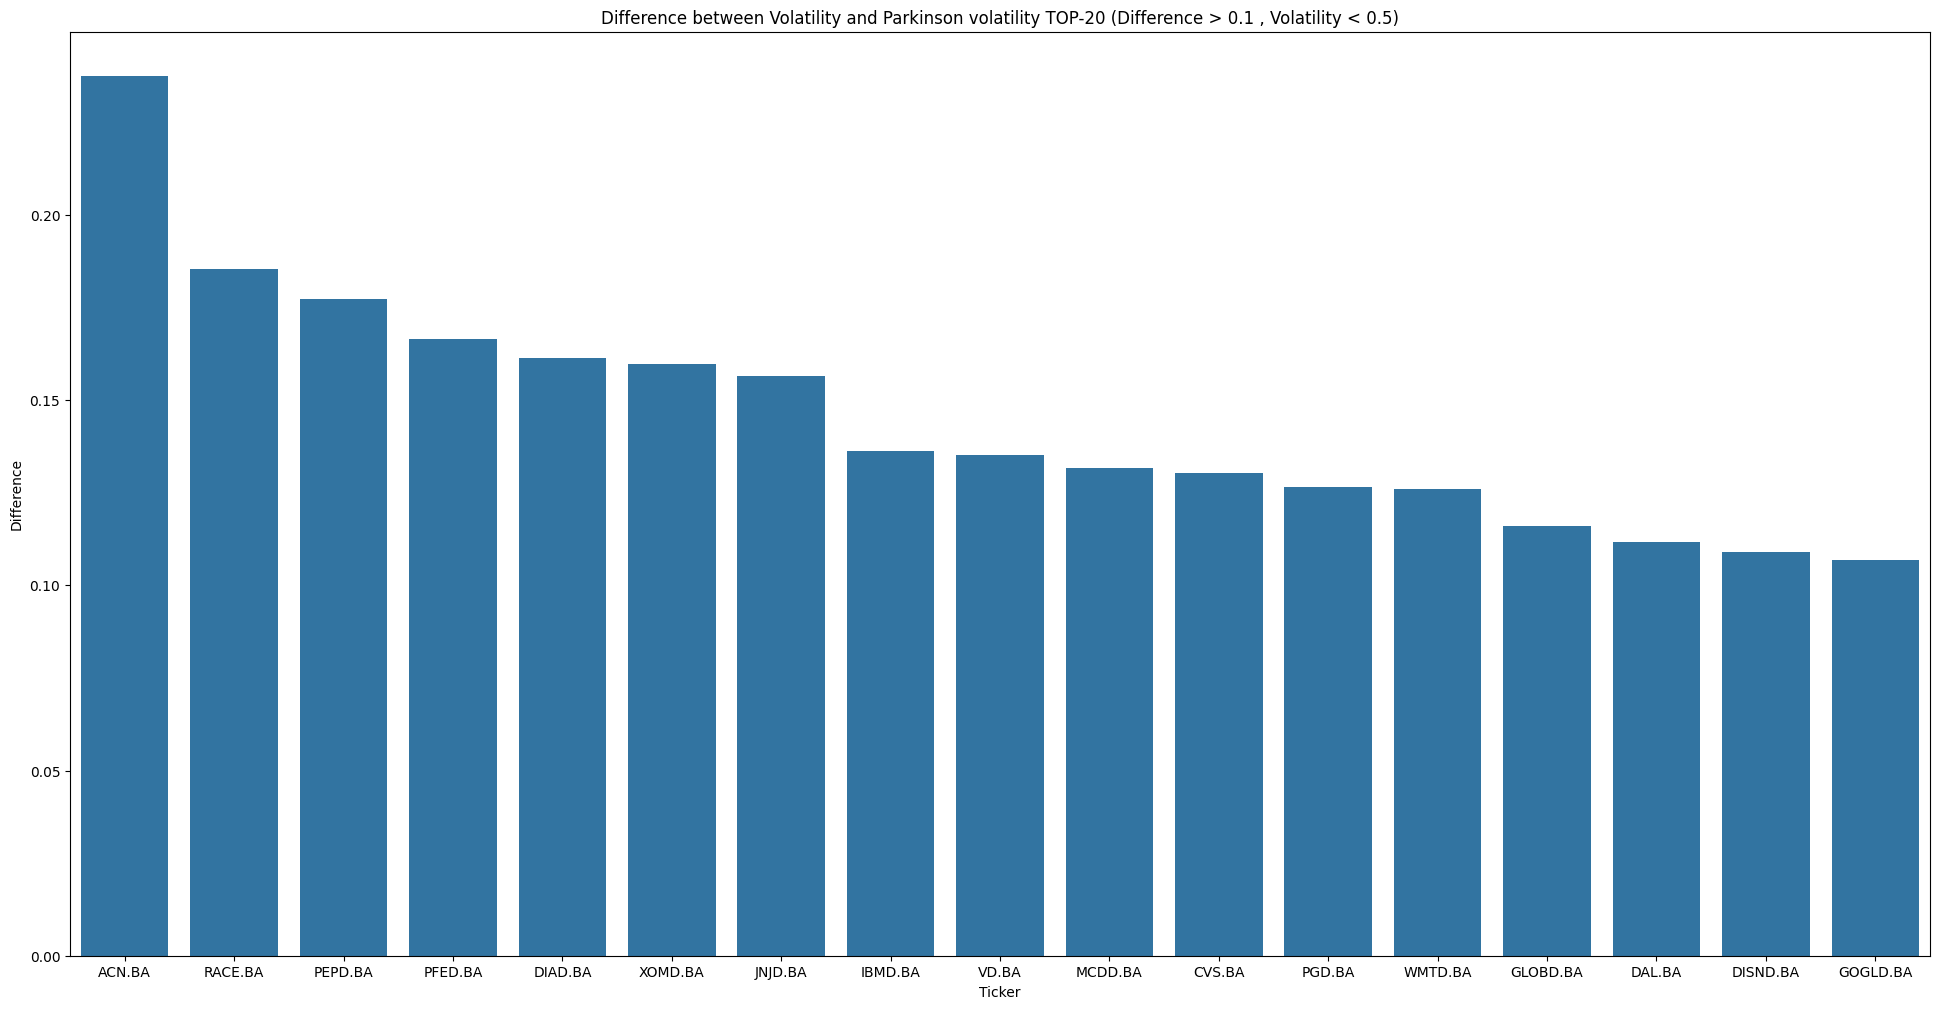

In [8]:
find_ticker(0.1 , 0.5)

In [9]:
import pickle 

pickle.dump(find_ticker , open("find_ticker" , "wb"))